In [36]:
import pandas as pd

# Read data from CSV file
df = pd.read_csv('profile.csv')

# Convert string representations to dictionaries
df['cpu_usage_percentage'] = df['cpu_usage_percentage'].apply(eval)
df['mem_usage_percentage'] = df['mem_usage_percentage'].apply(eval)

# Function to calculate average CPU utilization
def calculate_avg(row):
    values = list(row.values())
    if len(values) != 4: return -1
    return sum(values) / len(values)

# Apply the function to each row
df['avg_cpu_utilization'] = df['cpu_usage_percentage'].apply(calculate_avg)
df['avg_mem_utilization'] = df['mem_usage_percentage'].apply(calculate_avg)

# Drop rows where avg_cpu_utilization is 0
df = df[df['avg_cpu_utilization'] != -1]
df = df[df['avg_mem_utilization'] != -1]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             408 non-null    object 
 1   cluster_node_list     408 non-null    object 
 2   cpu_usage_percentage  408 non-null    object 
 3   node_status           408 non-null    object 
 4   cpu_reserve           408 non-null    object 
 5   mem_usage_percentage  408 non-null    object 
 6   mem_reserve           408 non-null    object 
 7   Power                 408 non-null    int64  
 8   Energy                408 non-null    float64
 9   avg_cpu_utilization   408 non-null    float64
 10  avg_mem_utilization   408 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 35.2+ KB


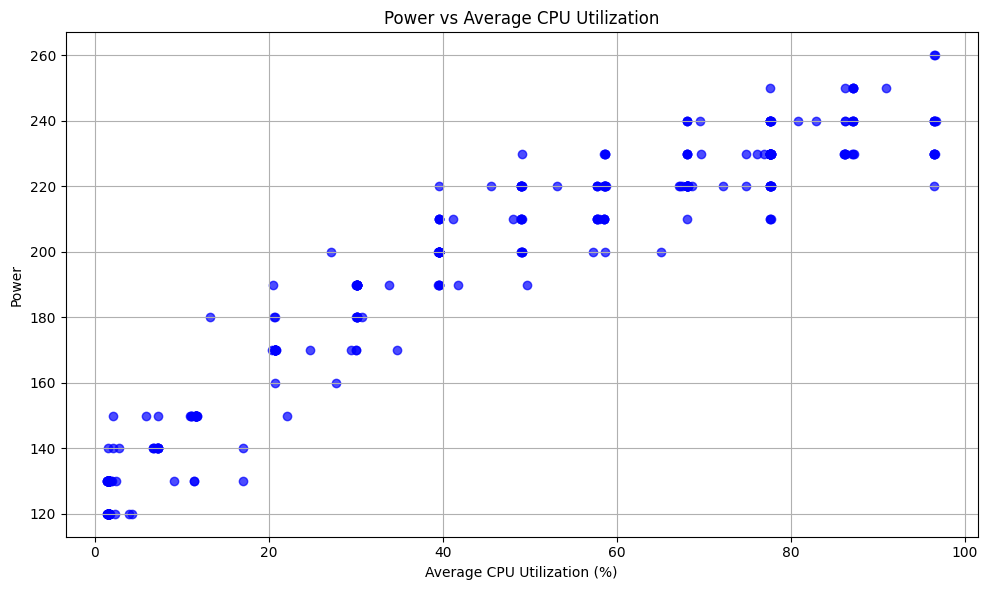

In [38]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_cpu_utilization'], df['Power'], color='blue', alpha=0.7)
plt.title('Power vs Average CPU Utilization')
plt.xlabel('Average CPU Utilization (%)')
plt.ylabel('Power')
plt.grid(True)
plt.tight_layout()
plt.show()

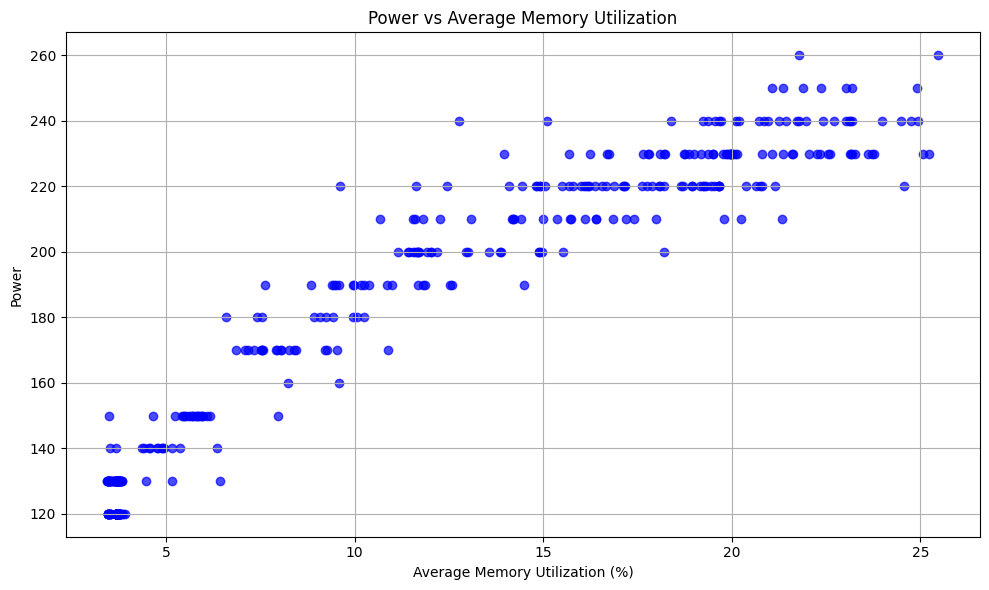

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_mem_utilization'], df['Power'], color='blue', alpha=0.7)
plt.title('Power vs Average Memory Utilization')
plt.xlabel('Average Memory Utilization (%)')
plt.ylabel('Power')
plt.grid(True)
plt.tight_layout()
plt.show()

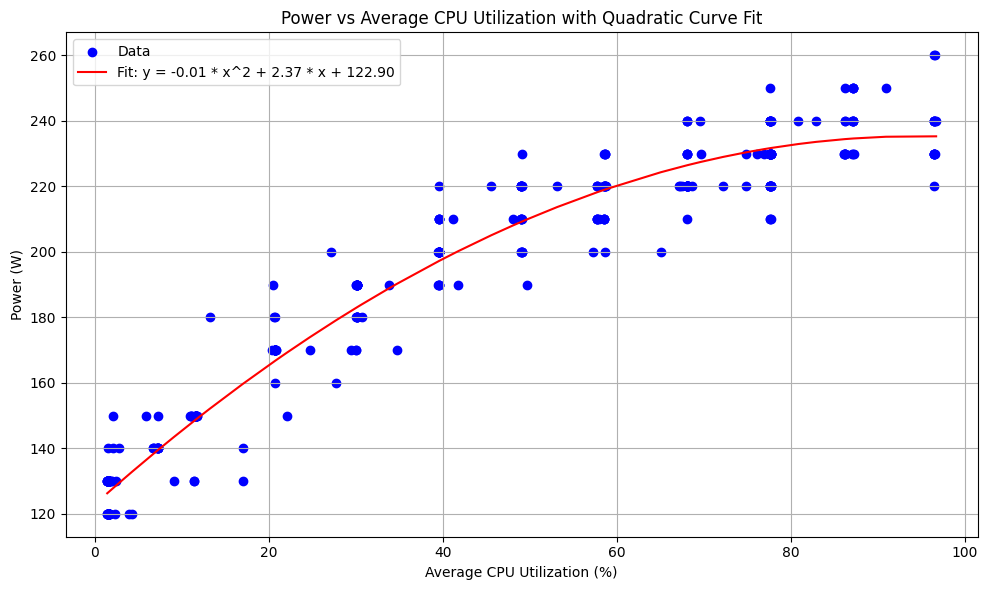

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Read data from CSV file
df = pd.read_csv('profile.csv')

# Convert string representations to dictionaries
df['cpu_usage_percentage'] = df['cpu_usage_percentage'].apply(eval)

# Function to calculate average CPU utilization
def calculate_avg_cpu(row):
    cpu_values = list(row.values())
    return sum(cpu_values) / len(cpu_values)

# Apply the function to each row
df['avg_cpu_utilization'] = df['cpu_usage_percentage'].apply(calculate_avg_cpu)

# Drop rows where avg_cpu_utilization is 0
df = df[df['avg_cpu_utilization'] != 0]

# Define the quadratic model function: y = a * x^2 + b * x + c
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Extract x and y data
x_data = df['avg_cpu_utilization']
y_data = df['Power']

# Perform curve fitting
popt, pcov = curve_fit(quadratic_model, x_data, y_data)

# Obtain the fitted parameters
a_fit, b_fit, c_fit = popt

# Predicted y values based on the fitted model
y_fit = quadratic_model(x_data, a_fit, b_fit, c_fit)

# Sorting x_data and corresponding y_data
sorted_indices = np.argsort(x_data)
x_sorted = x_data.iloc[sorted_indices]
y_sorted = y_data.iloc[sorted_indices]
y_fit_sorted = y_fit[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_sorted, y_sorted, color='blue', label='Data')
plt.plot(x_sorted, y_fit_sorted, color='red', label=f'Fit: y = {a_fit:.2f} * x^2 + {b_fit:.2f} * x + {c_fit:.2f}')
plt.title('Power vs Average CPU Utilization with Quadratic Curve Fit')
plt.xlabel('Average CPU Utilization (%)')
plt.ylabel('Power (W)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

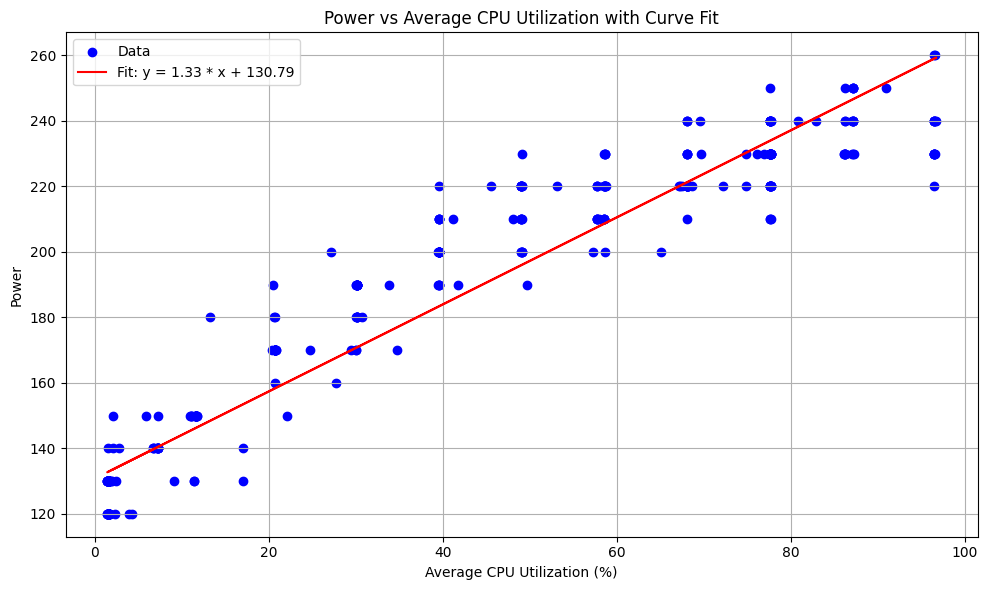

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Read data from CSV file
df = pd.read_csv('profile.csv')

# Convert string representations to dictionaries
df['cpu_usage_percentage'] = df['cpu_usage_percentage'].apply(eval)

# Function to calculate average CPU utilization
def calculate_avg_cpu(row):
    cpu_values = list(row.values())
    return sum(cpu_values) / len(cpu_values)

# Apply the function to each row
df['avg_cpu_utilization'] = df['cpu_usage_percentage'].apply(calculate_avg_cpu)

# Drop rows where avg_cpu_utilization is 0
df = df[df['avg_cpu_utilization'] != 0]

# Define the model function (linear model: y = a * x + b)
def linear_model(x, a, b):
    return a * x + b

# Extract x and y data
x_data = df['avg_cpu_utilization']
y_data = df['Power']

# Perform curve fitting
popt, pcov = curve_fit(linear_model, x_data, y_data)

# Obtain the fitted parameters
a_fit, b_fit = popt

# Predicted y values based on the fitted model
y_fit = linear_model(x_data, a_fit, b_fit)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='Data')
plt.plot(x_data, y_fit, color='red', label=f'Fit: y = {a_fit:.2f} * x + {b_fit:.2f}')
plt.title('Power vs Average CPU Utilization with Curve Fit')
plt.xlabel('Average CPU Utilization (%)')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
